# NLP Project


## Problem Definition


- {problem def}


## Data Loading


Data availible from https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv


### Import Libraries we need


In [1]:
%pip install TextBlob


Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
%pip install wikipedia-api


  Obtaining dependency information for wikipedia-api from https://files.pythonhosted.org/packages/2f/3f/919727b460d88c899d110f98d1a0c415264b5d8ad8176f14ce7ad9db0e3b/Wikipedia_API-0.6.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import pickle
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import bs4
import wikipediaapi

from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud 


In [2]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brooks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load the Data


In [3]:
path = 'dbpedia_data.csv'
raw_dbpedia_data = pd.read_csv(path)


In [4]:
raw_dbpedia_data.head()


,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


## EDA


In [5]:
raw_dbpedia_data.shape


(42786, 3)

In [6]:
raw_dbpedia_data.head()


,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [7]:
name_error_filter = raw_dbpedia_data['name'].str.contains('%C')
raw_dbpedia_data[name_error_filter]


,URI,name,text
35,<http://dbpedia.org/resource/Freimut_B%C3%B6rn...,Freimut B%C3%B6rngen,freimut brngen born october 17 1930 is a germa...
36,<http://dbpedia.org/resource/Th%C3%BCring_Br%C...,Th%C3%BCring Br%C3%A4m,thring brm born 10 april 1944 is a swiss compo...
73,<http://dbpedia.org/resource/Marcel_J._Melan%C...,Marcel J. Melan%C3%A7on,marcel j mlanon is a philosopher and scientist...
85,<http://dbpedia.org/resource/Zvonimir_Juri%C4%87>,Zvonimir Juri%C4%87,zvonimir juri born 4 june 1971 is a croatian f...
122,<http://dbpedia.org/resource/Se%C3%A1n_%C3%93g...,Se%C3%A1n %C3%93g %C3%93 hAilp%C3%ADn,sen g hailpn born 22 may 1977 is a fijianirish...
...,...,...,...
42724,<http://dbpedia.org/resource/Jos%C3%A9_Higueras>,Jos%C3%A9 Higueras,jos higueras born february 28 1953 in diezma a...
42732,<http://dbpedia.org/resource/Ole_Gunnar_Solskj...,Ole Gunnar Solskj%C3%A6r,ole gunnar solskjr born 26 february 1973 is a ...
42733,<http://dbpedia.org/resource/Gerd_Gr%C3%B8nvol...,Gerd Gr%C3%B8nvold Saue,gerd grnvold saue born 20 january 1930 is a no...
42746,<http://dbpedia.org/resource/Floria_M%C3%A1rquez>,Floria M%C3%A1rquez,floria mrquez b february 11 1950 in caracas is...


## Data Cleaning


### Taking care of utf-8 codes


In [8]:
clean_dbpedia_data = raw_dbpedia_data.copy()


- Steps to cleaning

  1. Remove percent symbols to isolate utf-8 codes

  1. Convert utf-8 code to corresponding character using KV pair


In [9]:
pickle_file_path = 'utf8_char_dict.pkl'
with open(pickle_file_path, 'rb') as file:

    utf8_char_dict = pickle.load(file)


In [10]:
utf8_char_dict


{'C380': 'À',
 'C381': 'Á',
 'C382': 'Â',
 'C383': 'Ã',
 'C384': 'Ä',
 'C385': 'Å',
 'C386': 'Æ',
 'C387': 'Ç',
 'C388': 'È',
 'C389': 'É',
 'C38A': 'Ê',
 'C38B': 'Ë',
 'C38C': 'Ì',
 'C38D': 'Í',
 'C38E': 'Î',
 'C38F': 'Ï',
 'C390': 'Ð',
 'C391': 'Ñ',
 'C392': 'Ò',
 'C393': 'Ó',
 'C394': 'Ô',
 'C395': 'Õ',
 'C396': 'Ö',
 'C397': '×',
 'C398': 'Ø',
 'C399': 'Ù',
 'C39A': 'Ú',
 'C39B': 'Û',
 'C39C': 'Ü',
 'C39D': 'Ý',
 'C39E': 'Þ',
 'C39F': 'ß',
 'C3A0': 'à',
 'C3A1': 'á',
 'C3A2': 'â',
 'C3A3': 'ã',
 'C3A4': 'ä',
 'C3A5': 'å',
 'C3A6': 'æ',
 'C3A7': 'ç',
 'C3A8': 'è',
 'C3A9': 'é',
 'C3AA': 'ê',
 'C3AB': 'ë',
 'C3AC': 'ì',
 'C3AD': 'í',
 'C3AE': 'î',
 'C3AF': 'ï',
 'C3B0': 'ð',
 'C3B1': 'ñ',
 'C3B2': 'ò',
 'C3B3': 'ó',
 'C3B4': 'ô',
 'C3B5': 'õ',
 'C3B6': 'ö',
 'C3B7': '÷',
 'C3B8': 'ø',
 'C3B9': 'ù',
 'C3BA': 'ú',
 'C3BB': 'û',
 'C3BC': 'ü',
 'C3BD': 'ý',
 'C3BE': 'þ',
 'C3BF': 'ÿ',
 'C480': 'Ā',
 'C481': 'ā',
 'C482': 'Ă',
 'C483': 'ă',
 'C484': 'Ą',
 'C485': 'ą',
 'C486': 'Ć',
 'C487

In [11]:
# remove percent signs from columns
clean_dbpedia_data['name'] = clean_dbpedia_data['name'].str.replace('%', '')
clean_dbpedia_data


,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
42781,<http://dbpedia.org/resource/Motoaki_Takenouchi>,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,<http://dbpedia.org/resource/Alan_Judge_(footb...,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,<http://dbpedia.org/resource/Eduardo_Lara>,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,<http://dbpedia.org/resource/Tatiana_Faberg%C3...,Tatiana FabergC3A9,tatiana faberg is an author and faberg scholar...


In [14]:
# replace utf8 characters with their respective ascii characters
for utf8_char, ascii_char in utf8_char_dict.items():
    clean_dbpedia_data = clean_dbpedia_data.replace(utf8_char, ascii_char, regex=True)


## Data Preprocessing


### Add a TextBlob Column


In [15]:
# add a text blob column to the dataframe
clean_dbpedia_data['text_blob'] = clean_dbpedia_data['text'].apply(lambda x: TextBlob(x))

# tokenize the textblob column in a new column
clean_dbpedia_data['tokenized_text'] = clean_dbpedia_data['text_blob'].apply(lambda x: x.words)

# convert the tokenized text to a string
clean_dbpedia_data['tokenized_text'] = clean_dbpedia_data['tokenized_text'].apply(lambda x: ' '.join(x))


In [79]:
clean_dbpedia_data.head()


,URI,name,text,text_blob,tokenized_text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"(d, i, g, b, y, , m, o, r, r, e, l, l, , b, ...",digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"(a, l, f, r, e, d, , j, , l, e, w, y, , a, ...",alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"(h, a, r, p, d, o, g, , b, r, o, w, n, , i, ...",harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"(f, r, a, n, z, , r, o, t, t, e, n, s, t, e, ...",franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"(h, e, n, r, y, , k, r, v, i, t, s, , b, o, ...",henry krvits born 30 december 1974 in tallinn ...


In [19]:
# create a tfidf vectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


In [20]:
# fit the vectorizer to the tokenized text
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_dbpedia_data['tokenized_text'])


## Data Processing


### DBpedia Similarity


In [22]:
# create a nearest neighbors model
nn = NearestNeighbors(n_neighbors= 11, algorithm='brute', metric='cosine')

# fit the model to the tfidf matrix
nn.fit(tfidf_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=11)

In [23]:
input_index = 0

distances, indices = nn.kneighbors(tfidf_matrix[input_index])


In [24]:
distances, indices


(array([[0.        , 0.57876549, 0.63720381, 0.65009895, 0.65829665,
         0.661039  , 0.67279984, 0.67568034, 0.6776727 , 0.67861382,
         0.67928496]]),
 array([[    0, 32466, 36591,  1347, 31705, 28169, 22390, 22123, 27556,
          6126, 21352]], dtype=int64))

In [25]:
# Get the indices of the top 10 most similar people (excluding the input person)
related_indices = indices[0][1:]

related_indices


array([32466, 36591,  1347, 31705, 28169, 22390, 22123, 27556,  6126,
       21352], dtype=int64)

In [26]:
# calculate similarity scores for the top 10 most similar people
similarity_scores = 1 - distances[0][1:]
similarity_scores


array([0.42123451, 0.36279619, 0.34990105, 0.34170335, 0.338961  ,
       0.32720016, 0.32431966, 0.3223273 , 0.32138618, 0.32071504])

In [27]:
#print the most similar people and their similarity scores
for i, index in enumerate(related_indices):
    print(f'{i+1}: {clean_dbpedia_data.iloc[index]["name"]} - Similarity Score: {similarity_scores[i]}')


1: Steven Browne - Similarity Score: 0.4212345114470275
2: Peter Freeman (footballer) - Similarity Score: 0.36279618826463567
3: Lindsay Smith (Australian footballer) - Similarity Score: 0.34990105187074927
4: Earl Spalding - Similarity Score: 0.34170334853575146
5: Relton Roberts - Similarity Score: 0.33896100103875215
6: Mark Austin (footballer) - Similarity Score: 0.32720016215640646
7: Todd Curley - Similarity Score: 0.3243196627127787
8: Daniel Harris (footballer) - Similarity Score: 0.3223272998120794
9: Richard Ambrose - Similarity Score: 0.32138618090171367
10: Darren Pfeiffer - Similarity Score: 0.32071504127496464


In [28]:
# Perform sentiment analysis for the input person
sentiment = clean_dbpedia_data['text_blob'][input_index].sentiment.polarity

# Print the sentiment score
print(f"Sentiment Score: {sentiment}")


Sentiment Score: -0.041666666666666664


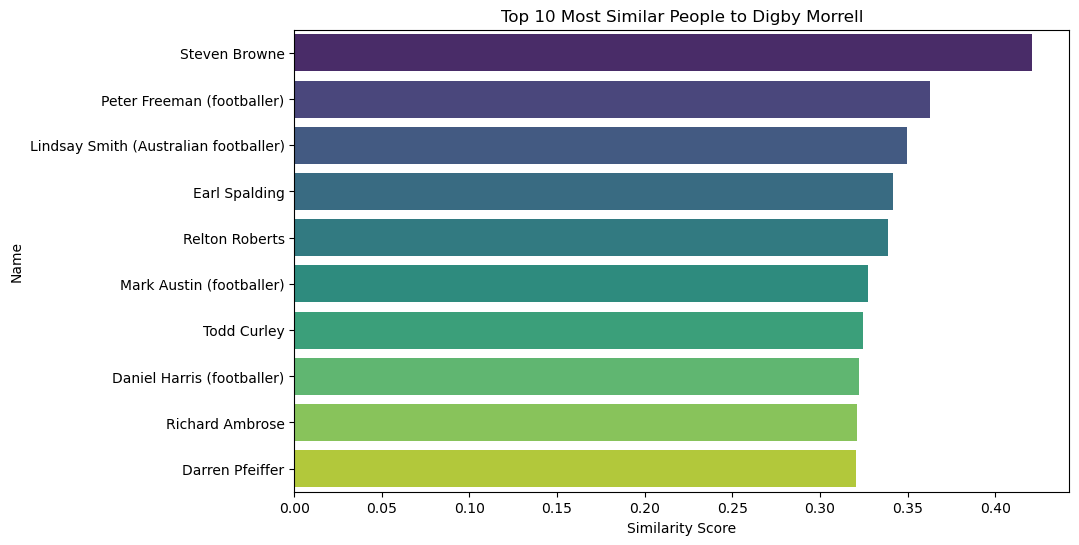

In [29]:
# Get the names and similarity scores of the top 10 most similar people
top_10_names = clean_dbpedia_data.iloc[related_indices]['name']
top_10_scores = similarity_scores[:10]
input_name = clean_dbpedia_data.iloc[input_index]['name']

# Create a dataframe with the names and scores
top_10_df = pd.DataFrame({'Name': top_10_names, 'Similarity Score': top_10_scores})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Name', data=top_10_df, palette='viridis')
plt.xlabel('Similarity Score')
plt.ylabel('Name')
plt.title(f'Top 10 Most Similar People to {input_name}')
plt.show()


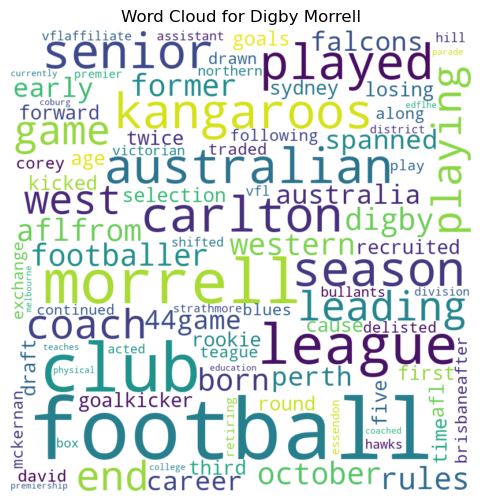

In [31]:
# create a word cloud for the input person
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(clean_dbpedia_data['tokenized_text'][input_index])


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {input_name}')
plt.show()


### Wikipedia Similarity


In [32]:
similar_people = [clean_dbpedia_data["name"][idx] for idx in related_indices]
similar_links = [clean_dbpedia_data["URI"][idx] for idx in related_indices]


In [35]:
similar_people.insert(0, input_name)
similar_links.insert(0, clean_dbpedia_data.iloc[input_index]['URI'])


In [37]:
similar_people, similar_links


(['Digby Morrell',
  'Steven Browne',
  'Peter Freeman (footballer)',
  'Lindsay Smith (Australian footballer)',
  'Earl Spalding',
  'Relton Roberts',
  'Mark Austin (footballer)',
  'Todd Curley',
  'Daniel Harris (footballer)',
  'Richard Ambrose',
  'Darren Pfeiffer'],
 ['<http://dbpedia.org/resource/Digby_Morrell>',
  '<http://dbpedia.org/resource/Steven_Browne>',
  '<http://dbpedia.org/resource/Peter_Freeman_(footballer)>',
  '<http://dbpedia.org/resource/Lindsay_Smith_(Australian_footballer)>',
  '<http://dbpedia.org/resource/Earl_Spalding>',
  '<http://dbpedia.org/resource/Relton_Roberts>',
  '<http://dbpedia.org/resource/Mark_Austin_(footballer)>',
  '<http://dbpedia.org/resource/Todd_Curley>',
  '<http://dbpedia.org/resource/Daniel_Harris_(footballer)>',
  '<http://dbpedia.org/resource/Richard_Ambrose>',
  '<http://dbpedia.org/resource/Darren_Pfeiffer>'])

In [38]:
# get wikipedia links from dbpedia pages
wiki_links = []
for i in similar_links:
  dbpedia = requests.get(i[1:-1])
  html = dbpedia.text
  dom = bs4.BeautifulSoup(html, "html.parser")
  wiki_thing = dom.select("[rev='foaf:primaryTopic']")[0].attrs["href"]
  wiki_links.append(wiki_thing)
print('\n'.join(wiki_links))



http://en.wikipedia.org/wiki/Digby_Morrell
http://en.wikipedia.org/wiki/Steven_Browne
http://en.wikipedia.org/wiki/Peter_Freeman_(footballer)
http://en.wikipedia.org/wiki/Lindsay_Smith_(Australian_footballer)
http://en.wikipedia.org/wiki/Earl_Spalding
http://en.wikipedia.org/wiki/Relton_Roberts
http://en.wikipedia.org/wiki/Mark_Austin_(footballer)
http://en.wikipedia.org/wiki/Todd_Curley
http://en.wikipedia.org/wiki/Daniel_Harris_(footballer)
http://en.wikipedia.org/wiki/Richard_Ambrose
http://en.wikipedia.org/wiki/Darren_Pfeiffer


In [39]:
# get text from wikipedia pages
wiki_texts = []
for url in wiki_links:
  topic = url.split("/")[-1]
  print( topic )
  wikip = wikipediaapi.Wikipedia(user_agent = 'foobar')
  wiki_texts.append( wikip.page(topic).text)
wiki_texts


Digby_Morrell
Steven_Browne
Peter_Freeman_(footballer)
Lindsay_Smith_(Australian_footballer)
Earl_Spalding
Relton_Roberts
Mark_Austin_(footballer)
Todd_Curley
Daniel_Harris_(footballer)
Richard_Ambrose
Darren_Pfeiffer


["Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).\nFrom Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.\nAfter the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football with the Nor

In [40]:
wiki_text_list_clean = [ wiki_text.replace("\n"," ").replace("\'s",'').replace('\'','') for wiki_text in wiki_texts ]
wiki_text_list_clean


['Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL). From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane. After the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football with the Norther

In [41]:
# create a new dataframe with the similar people and their wikipedia texts and links
wiki_df = pd.DataFrame()
wiki_df['URI'] = wiki_links
wiki_df['name'] = similar_people
wiki_df['text'] = wiki_text_list_clean
wiki_df


,URI,name,text
0,http://en.wikipedia.org/wiki/Digby_Morrell,Digby Morrell,Digby Morrell (born 10 October 1979) is a form...
1,http://en.wikipedia.org/wiki/Steven_Browne,Steven Browne,Steven Browne (born 1 February 1989) is an Aus...
2,http://en.wikipedia.org/wiki/Peter_Freeman_(fo...,Peter Freeman (footballer),Peter Freeman (born 1 April 1969) is a former ...
3,http://en.wikipedia.org/wiki/Lindsay_Smith_(Au...,Lindsay Smith (Australian footballer),Lindsay Smith (born 29 February 1980) is a for...
4,http://en.wikipedia.org/wiki/Earl_Spalding,Earl Spalding,Earl George Spalding (born 11 March 1965 in So...
5,http://en.wikipedia.org/wiki/Relton_Roberts,Relton Roberts,Relton Roberts (born 1 March 1986) is a former...
6,http://en.wikipedia.org/wiki/Mark_Austin_(foot...,Mark Austin (footballer),Mark Austin (born 24 February 1989) is an Aust...
7,http://en.wikipedia.org/wiki/Todd_Curley,Todd Curley,Todd Curley (born 14 January 1973) is a former...
8,http://en.wikipedia.org/wiki/Daniel_Harris_(fo...,Daniel Harris (footballer),Daniel Harris (born 10 May 1982) is a former p...
9,http://en.wikipedia.org/wiki/Richard_Ambrose,Richard Ambrose,Richard Ambrose (born 10 June 1972) is a forme...


In [42]:
# create a new column with the textblob of the wikipedia text
wiki_df['text_blob'] = wiki_df['text'].apply(lambda x: TextBlob(x))

# tokenize the textblob column in a new column
wiki_df['tokenized_text'] = wiki_df['text_blob'].apply(lambda x: x.words)

# convert the tokenized text to a string
wiki_df['tokenized_text'] = wiki_df['tokenized_text'].apply(lambda x: ' '.join(x))


In [45]:
wiki_df


,URI,name,text,text_blob,tokenized_text
0,http://en.wikipedia.org/wiki/Digby_Morrell,Digby Morrell,Digby Morrell (born 10 October 1979) is a form...,"(D, i, g, b, y, , M, o, r, r, e, l, l, , (, ...",Digby Morrell born 10 October 1979 is a former...
1,http://en.wikipedia.org/wiki/Steven_Browne,Steven Browne,Steven Browne (born 1 February 1989) is an Aus...,"(S, t, e, v, e, n, , B, r, o, w, n, e, , (, ...",Steven Browne born 1 February 1989 is an Austr...
2,http://en.wikipedia.org/wiki/Peter_Freeman_(fo...,Peter Freeman (footballer),Peter Freeman (born 1 April 1969) is a former ...,"(P, e, t, e, r, , F, r, e, e, m, a, n, , (, ...",Peter Freeman born 1 April 1969 is a former Au...
3,http://en.wikipedia.org/wiki/Lindsay_Smith_(Au...,Lindsay Smith (Australian footballer),Lindsay Smith (born 29 February 1980) is a for...,"(L, i, n, d, s, a, y, , S, m, i, t, h, , (, ...",Lindsay Smith born 29 February 1980 is a forme...
4,http://en.wikipedia.org/wiki/Earl_Spalding,Earl Spalding,Earl George Spalding (born 11 March 1965 in So...,"(E, a, r, l, , G, e, o, r, g, e, , S, p, a, ...",Earl George Spalding born 11 March 1965 in Sou...
5,http://en.wikipedia.org/wiki/Relton_Roberts,Relton Roberts,Relton Roberts (born 1 March 1986) is a former...,"(R, e, l, t, o, n, , R, o, b, e, r, t, s, , ...",Relton Roberts born 1 March 1986 is a former p...
6,http://en.wikipedia.org/wiki/Mark_Austin_(foot...,Mark Austin (footballer),Mark Austin (born 24 February 1989) is an Aust...,"(M, a, r, k, , A, u, s, t, i, n, , (, b, o, ...",Mark Austin born 24 February 1989 is an Austra...
7,http://en.wikipedia.org/wiki/Todd_Curley,Todd Curley,Todd Curley (born 14 January 1973) is a former...,"(T, o, d, d, , C, u, r, l, e, y, , (, b, o, ...",Todd Curley born 14 January 1973 is a former A...
8,http://en.wikipedia.org/wiki/Daniel_Harris_(fo...,Daniel Harris (footballer),Daniel Harris (born 10 May 1982) is a former p...,"(D, a, n, i, e, l, , H, a, r, r, i, s, , (, ...",Daniel Harris born 10 May 1982 is a former pro...
9,http://en.wikipedia.org/wiki/Richard_Ambrose,Richard Ambrose,Richard Ambrose (born 10 June 1972) is a forme...,"(R, i, c, h, a, r, d, , A, m, b, r, o, s, e, ...",Richard Ambrose born 10 June 1972 is a former ...


In [46]:
# create a tfidf vectorizer
tfidf_vectorizer_wiki = TfidfVectorizer(stop_words='english')

# fit the vectorizer to the tokenized text
tfidf_matrix_wiki = tfidf_vectorizer_wiki.fit_transform(wiki_df['tokenized_text'])


In [49]:
#create a nearest neighbors model
nn_wiki = NearestNeighbors(n_neighbors= 11, algorithm='brute', metric='cosine')

# fit the model to the tfidf matrix
nn_wiki.fit(tfidf_matrix_wiki)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=11)

In [50]:
wiki_input_index = 0

distances, indices = nn_wiki.kneighbors(tfidf_matrix_wiki[wiki_input_index])


In [51]:
wiki_related_indices = indices[0][1:]


In [52]:
# calculate similarity scores for the top 10 most similar people
similarity_scores_wiki = 1 - distances[0][1:]


In [55]:
# print the most similar people and their similarity scores
for i, index in enumerate(wiki_related_indices):
    print(f'{wiki_df.iloc[index]["name"]} - Similarity Score: {similarity_scores_wiki[i]}')


Todd Curley - Similarity Score: 0.31009575209400597
Earl Spalding - Similarity Score: 0.2794019970652637
Steven Browne - Similarity Score: 0.2787560500278441
Daniel Harris (footballer) - Similarity Score: 0.2565238718200892
Darren Pfeiffer - Similarity Score: 0.2449109900033032
Peter Freeman (footballer) - Similarity Score: 0.24272229478794038
Relton Roberts - Similarity Score: 0.2347539463572439
Richard Ambrose - Similarity Score: 0.2344662921845475
Mark Austin (footballer) - Similarity Score: 0.21594158325249113
Lindsay Smith (Australian footballer) - Similarity Score: 0.2156901430836401


C:\Users\Brooks\AppData\Local\Temp\ipykernel_16708\2592790446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_wiki_df['Similarity Score'] = similarity_scores_wiki[:10]


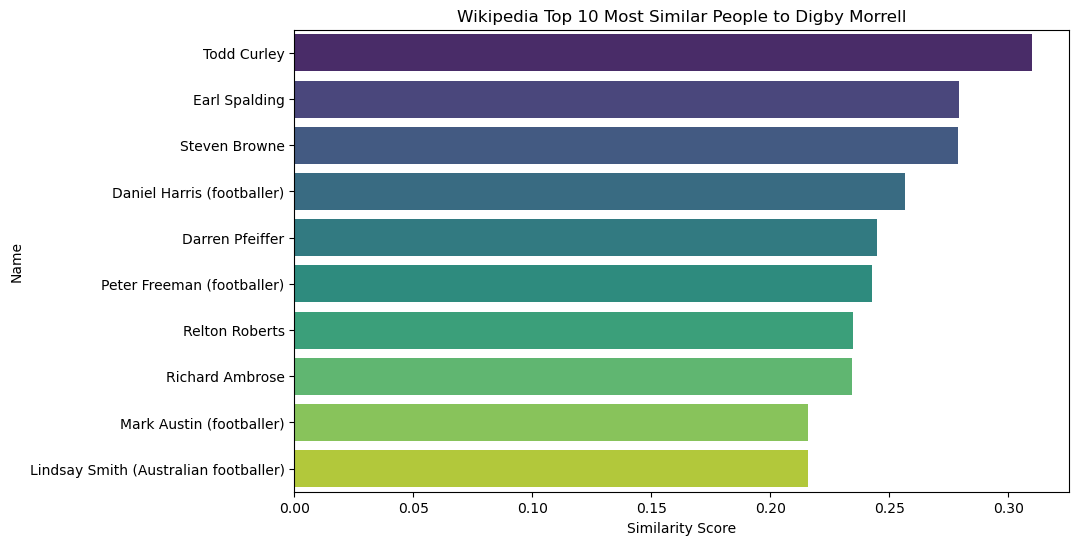

In [68]:
top_10_wiki_df = wiki_df.iloc[wiki_related_indices[:10]]
top_10_wiki_df['Similarity Score'] = similarity_scores_wiki[:10]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='name', data=top_10_wiki_df, palette='viridis')
plt.xlabel('Similarity Score')
plt.ylabel('Name')
plt.title(f'Wikipedia Top 10 Most Similar People to {input_name}')
plt.show()



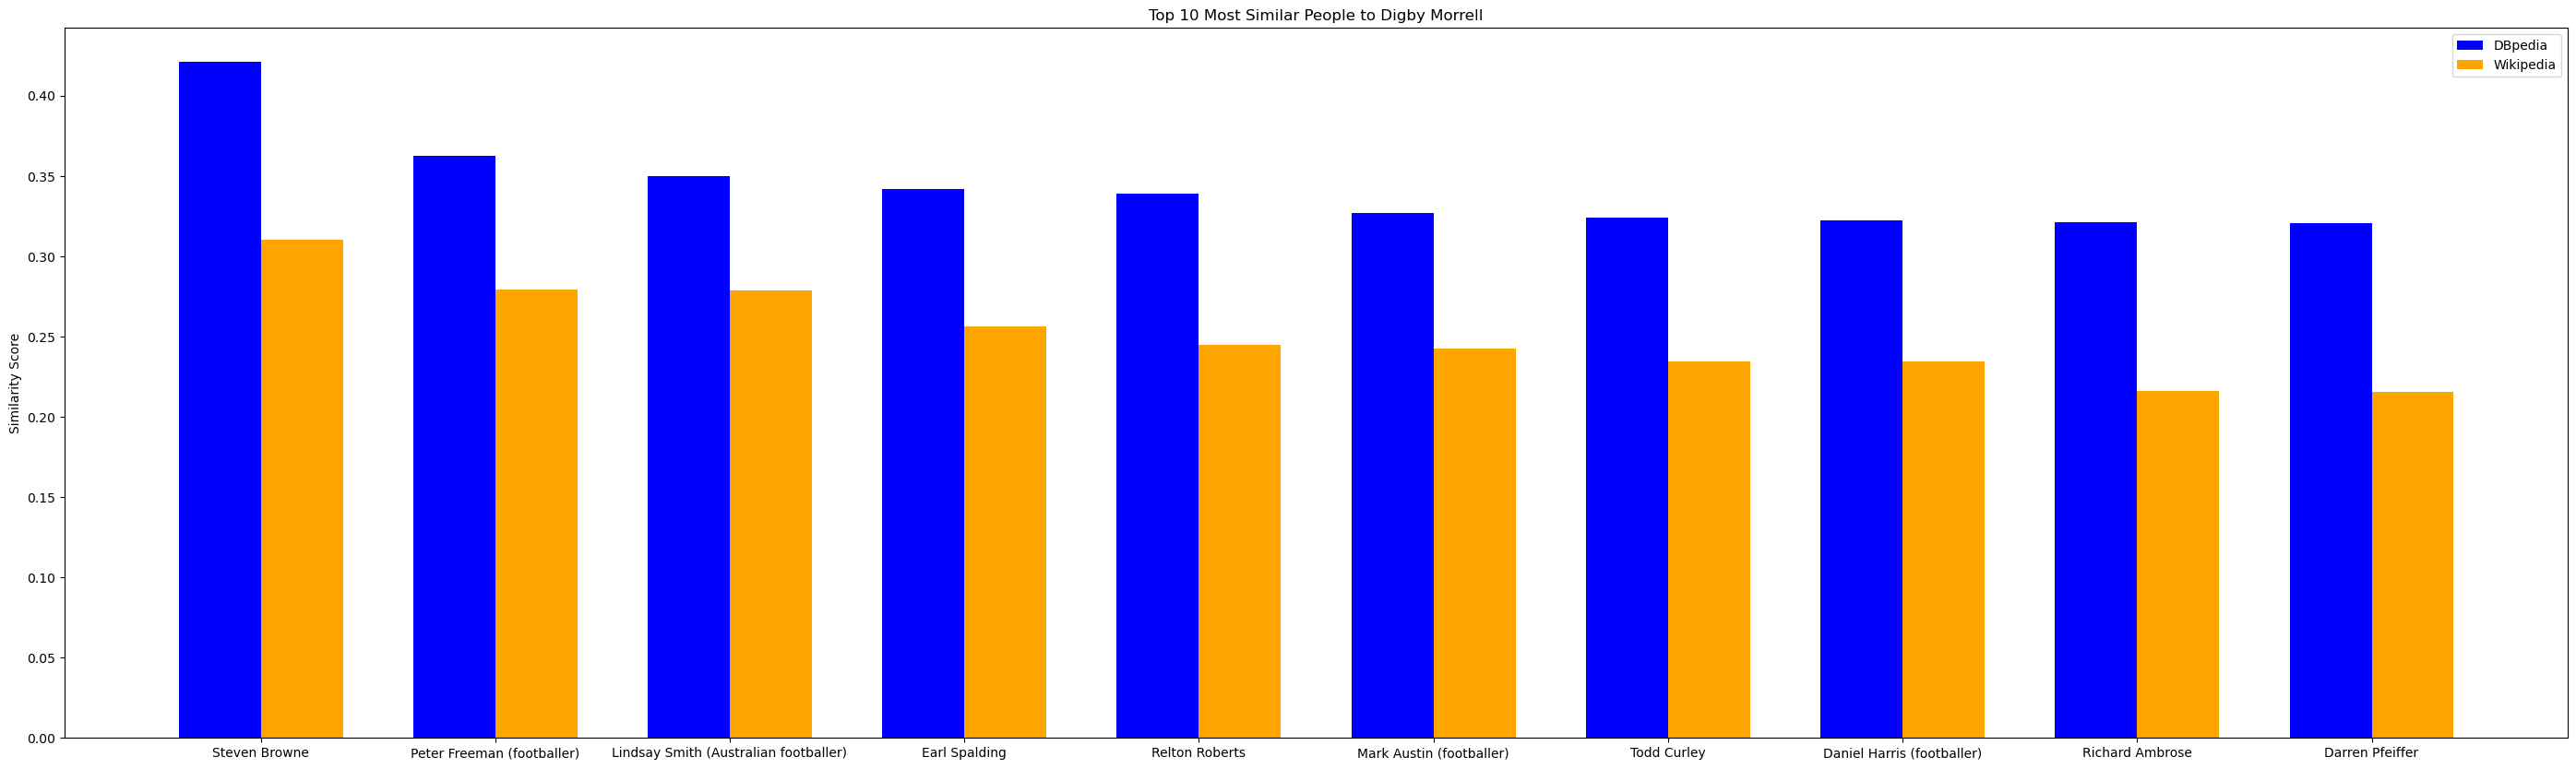

In [74]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(35, 10))

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x1 = np.arange(len(top_10_df))
x2 = np.arange(len(top_10_wiki_df))

# Plot the first barplot
ax.bar(x1, top_10_df['Similarity Score'], width=bar_width, label='DBpedia', color='blue')

# Plot the second barplot
ax.bar(x2 + bar_width, top_10_wiki_df['Similarity Score'], width=bar_width, label='Wikipedia', color='orange')

# Set the x-axis labels
ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(top_10_df['Name'])

# Set the y-axis label
ax.set_ylabel('Similarity Score')

# Set the title
ax.set_title(f'Top 10 Most Similar People to {input_name}')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [78]:
# export clean_dbpedia_data to a csv file
clean_dbpedia_data.to_csv('clean_dbpedia_data.csv', index=False)


### Conclusions & Future Prospects
